# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **<br>
Classification. The students will be classified as either **Yes**, the student needs early intervention; or **No**,the student doesn't need intervention. 

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1] - 1

# TODO: Calculate passing students
n_passed = sum(student_data['passed'] == 'yes')

# TODO: Calculate failing students
n_failed = sum(student_data['passed'] == 'no')

# TODO: Calculate graduation rate
grad_rate = 1.0 * n_passed / (n_passed + n_failed) * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=num_train, random_state=0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these four models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce four tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List four supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

Let's take a look at supervised learning alogrithms that are both applicable and non-applicable to this problem.

**Answer: **<br>

**Gaussian Naive Bayes Classifier (NB)**

**Overview**:<br>
Naive Bayes classifies samples by applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. The time and space complexity of Naive Bayes Classifier are both O(m\*n) where m is the number of features and n is the number of samples. Naive Bayes classification algorithm calculates P(y|x) for all the features of all the samples therefore needs m\*n steps and memory cells. One remarkable application of Naive Bayes classifier is text classification, such as filtering spams based on a bag-of-words model. 

**Pros**:<br>
- Easy implementation.
- Low computation cost.
- Low sensitivity to irrelevant data.

**Cons**<sup>[1]</sup>:<br>
- Intrinsic weakness due to the assumption that all features are idependent from each other which may lead to unsatisfying classification reasult for combination of features.
- Can be fooled by zero frequencies<sup>[4]</sup>.

**Why Chosen**:<br>
For this assignment, a quick Gaussian Naive Bayes classifier is chosen as a baseline case for the classification problem.

[1][Quora answer](https://www.quora.com/Classification-machine-learning-When-should-I-use-a-K-NN-classifier-over-a-Naive-Bayes-classifier)

---
**Support Vector Machines Classifier (SVM)**

**Overview**: <br>
SVM classifies samples by a separating hyperplane. It is flexible with non-traditional data input, eg. string, which makes it versatile in many applications, such as, text classification, image classification, bioinformatics (protein classification, cancer classification) and hand-written character classification. The time and space complexity of SVM classifier are both O(n<sup>3</sup>) where n is the sample size<sup>[2]</sup>.

**Pros**<sup>[3,4]</sup>:<br>
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
- Overfitting can be controlled by using soft margin.
- No local minima in doing the convex optimization.

**Cons**<sup>[3]</sup>:<br>
- If the number of features is much greater than the number of samples, the method is likely to give poor performances.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.
- Sensitive to noisy (mis-labeled) data.
- The classification results can be very sensitive to the selection of kernel which makes the choice of kernel crucial.
- Poor performance on multiclass classification.
- Poor performance on highly skewed/imbalanced data sets.

**Why Chosen**:<br>
Considering the target dataset is relatively small, the cost of computation is not a crucial factor, hence SVM is worth trying.

[2][Core Vector Machines: Fast SVM Training on Very Large Data Sets](http://machinelearning.wustl.edu/mlpapers/paper_files/TsangKC05.pdf)<br>
[3][Introduction to Support Vector Machines](http://www.cs.rutgers.edu/~mlittman/courses/ml04/svm.pdf)<br>
[4][Support Vector Machines by Andrew W. Moore](http://www.autonlab.org/tutorials/svm15.pdf)<br>

---
**K-Nearest Neighbors Classifier (KNN)**<br>

**Overview**:<br>
KNN is a non-parametric, instance-based classifier that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions)<sup>[5]</sup>. With no training involved, the lazy classifier is powerful in many applications, especially in low-dimensional datasets, computer security(intrusion detection), fault detection in semiconducter manufacturing, video content retrieval, gene expression, protein-protein interaction and 3D structure prediction<sup>[6]</sup>. The complexity of KNN Classifier is O(n<sup>2</sup>) where n is the number of data points. 

**Pros**:<br>
- Easy implementation.
- Naturally handles multiclass classification and regression.

**Cons**<sup>[1,6]</sup>:<br>
- Expensive and slow to predict new instances.
- Must defien a meaningful distance metric function.
- Performs poorly on high-dimensionality datases.
- Have to tune k.
- Doesn't know which attributes are more important

**Why Chosen**:<br>
Due to our small size dataset, we can try KNN with a quick and easy implementaion.

[5][K Nearest Neighbors - Classification](http://www.saedsayad.com/k_nearest_neighbors.htm)<br>
[6][Machine Learning Algorithm Cheat Sheet](http://www.lauradhamilton.com/machine-learning-algorithm-cheat-sheet)<br>

---
**Decision Trees Classifier (DT)**<br>

**Overview**:<br>
DT classifies samples with a tree-like model based on a set of if-then-else decision rules. The standard Decision Tree classifier has a time complexity of O(nm<sup>3</sup>) and a space complexity of O(n) where n is the number of samples and m is the number of features<sup>[7]</sup>. Applications of DT include: star classification, medical diagnosis, credit risk analysis.

**Pros**<sup>[7]</sup>:<br>
- Easy to understand and interpret. 
- Fast and accurate.
- Robust to noise and missing values.

**Cons**:<br>
- Doesn't treat well non-rectangular regions.
- Prone to overfitting. 

**Why Chosen**:<br>
Let's also try DT to get an overall comparison of single estimators.

[7][A Fast Decision Tree Learning Algorithm](http://aaaipress.org/Papers/AAAI/2006/AAAI06-080.pdf)<br>

---
**Ensemble Methods**<br>

**Overview**:<br>
Ensemble methods construct a set of classifiers and then classify new data points by taking a (weighted) vote of their predictions<sup>[8]</sup>. It performaces well on a variety of applications, such as distributed computing, privacy-preserving applications, large-scale data with reusable models and multiple sources of data.

**Pros**<sup>[9]</sup>:<br>
- Improves accuracy and robustness over single model methods.
- A complex problem can be decomposed into multiple sub-problems that are easier to understand and solve (divide-and-conquer approach).

**Cons**:<br>
- More complex than single estimator.
- Prone to overfitting.
- High cost of computation.

**Why Not Chosen**:<br>
Sample size is too small.

[8][Ensemble Methods in Machine Learning](http://web.engr.oregonstate.edu/~tgd/publications/mcs-ensembles.pdf)<br>
[9][On the Power of Ensemble: Supervised and Unsupervised Methods Reconciled](http://ews.uiuc.edu/~jinggao3/sdm10ensemble.htm)

---
**Stochastic Gradient Descent Classifier (SGD)**<br>

**Overview**<sup>[10]</sup>:<br>
SGD classifies samples by minimizing an objective function, often a loss function, by iteration. SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing.

**Pros**:<br>
- Scales well with sample size larger than 10<sup>5</sup>.
- Efficiency.

**Cons**:<br>
- Requires a number of hyperparameters such as the regularization parameter and the number of iterations.
- Sensitive to feature scaling.

**Why Not Chosen**:<br>
Sample size is too small.

[10][scikit-learn: 1.5. Stochastic Gradient Descent](http://scikit-learn.org/stable/modules/sgd.html)<br>

### Setup
Run the code cell below to initialize four helper functions which you can use for training and testing the four supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    # print "Trained model in {:.4f} seconds".format(end - start)
    return end - start

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()

    # Print and return results
    # print "Made predictions in {:.4f} seconds.".format(end - start)
    return (end - start), f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    # print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    training_time = train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    training_f1 = predict_labels(clf, X_train, y_train)[1]
    predict_time, test_f1 = predict_labels(clf, X_test, y_test)
    # print "F1 score for training set: {:.4f}.".format(training_f1)
    # print "F1 score for test set: {:.4f}.".format(test_f1)
    return training_time, predict_time, training_f1, test_f1                          

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the four supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for four different training set sizes: 100, 200, and 300. Hence, you should expect to have 12 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the four supervised learning models you've discussed in the previous section.
- Initialize the four models and store them in `clf_A`, `clf_B`, `clf_C` and `clf_D`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Four tables are provided after the following code cell which can be used to store your results.

In [7]:
# TODO: Import the four supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# TODO: Initialize the models
clf_A = GaussianNB()
clf_B = SVC(random_state=0)
clf_C = DecisionTreeClassifier(random_state=0)
clf_D = KNeighborsClassifier()

# TODO: Set up the training set sizes
# make sure to randomly select samples to get the real training time
import random
random.seed(0)

idx_100 = random.sample(X_train.index.values, 100)
X_train_100 = X_train.loc[idx_100, :]
y_train_100 = y_train[idx_100]

idx_200 = random.sample(X_train.index.values, 200)
X_train_200 = X_train.loc[idx_200, :]
y_train_200 = y_train[idx_200]

X_train_300 = X_train
y_train_300 = y_train


# TODO: Execute the 'train_predict' function for each classifier and each training set size
clf_A_100 = train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
clf_A_200 = train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
clf_A_300 = train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)

clf_B_100 = train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
clf_B_200 = train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
clf_B_300 = train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)

clf_C_100 = train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
clf_C_200 = train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
clf_C_300 = train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

clf_D_100 = train_predict(clf_D, X_train_100, y_train_100, X_test, y_test)
clf_D_200 = train_predict(clf_D, X_train_200, y_train_200, X_test, y_test)
clf_D_300 = train_predict(clf_D, X_train_300, y_train_300, X_test, y_test)

print clf_A.__class__.__name__
print clf_A_100
print clf_A_200
print clf_A_300

print clf_B.__class__.__name__
print clf_B_100
print clf_B_200
print clf_B_300

print clf_C.__class__.__name__
print clf_C_100
print clf_C_200
print clf_C_300

print clf_D.__class__.__name__
print clf_D_100
print clf_D_200
print clf_D_300

GaussianNB
(0.0013718605041503906, 0.00023794174194335938, 0.84671532846715336, 0.7142857142857143)
(0.000759124755859375, 0.00021910667419433594, 0.8014184397163121, 0.75912408759124084)
(0.0007431507110595703, 0.00027108192443847656, 0.80882352941176461, 0.75)
SVC
(0.001138925552368164, 0.0006320476531982422, 0.84999999999999998, 0.75816993464052285)
(0.00436091423034668, 0.0012180805206298828, 0.85285285285285284, 0.7814569536423841)
(0.006333112716674805, 0.0017740726470947266, 0.86919831223628696, 0.75862068965517238)
DecisionTreeClassifier
(0.0007719993591308594, 0.00013899803161621094, 1.0, 0.67857142857142849)
(0.0011641979217529297, 0.00013589859008789062, 1.0, 0.67226890756302526)
(0.0017361640930175781, 0.0001399517059326172, 1.0, 0.71666666666666656)
KNeighborsClassifier
(0.0005738735198974609, 0.0010349750518798828, 0.82432432432432423, 0.6870229007633587)
(0.0005090236663818359, 0.001383066177368164, 0.86708860759493667, 0.75362318840579712)
(0.0006699562072753906, 0.0018

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer A - Gaussian Naive Bayes Classifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.0014 sec        |       0.0002 sec       |      0.8467      |     0.7143      |
| 200               |       0.0008 sec        |       0.0002 sec       |      0.8014      |     0.7591      |
| 300               |       0.0007 sec        |       0.0003 sec       |      0.8088      |     0.7500      |

** Classifer B - SVM Classifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.0011 sec        |       0.0006 sec       |      0.8500      |     0.7582      |
| 200               |       0.0043 sec        |       0.0012 sec       |      0.8529      |     0.7815      |
| 300               |       0.0063 sec        |       0.0018 sec       |      0.8692      |     0.7586      |

** Classifer C - Decission Tree Classifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.0008 sec        |       0.0001 sec       |      1.0000      |     0.6786      |
| 200               |       0.0012 sec        |       0.0001 sec       |      1.0000      |     0.6723      |
| 300               |       0.0017 sec        |       0.0001 sec       |      1.0000      |     0.7167      |

** Classifer D - k-Nearest Neighbors Classifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.0006 sec        |       0.0010 sec       |      0.8243      |     0.6870      |
| 200               |       0.0005 sec        |       0.0014 sec       |      0.8671      |     0.7536      |
| 300               |       0.0007 sec        |       0.0019 sec       |      0.8722      |     0.7482      |

## Choosing the Best Model
In this final section, you will choose from the four supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

Reorganize the results.

In [8]:
training_time = {}
training_time['GaussianNB'] = [clf_A_100[0], clf_A_200[0], clf_A_300[0]]
training_time['SVC'] = [clf_B_100[0], clf_B_200[0], clf_B_300[0]]
training_time['DT'] = [clf_C_100[0], clf_C_200[0], clf_C_300[0]]
training_time['KNN'] = [clf_D_100[0], clf_D_200[0], clf_D_300[0]]

predict_time = {}
predict_time['GaussianNB'] = [clf_A_100[1], clf_A_200[1], clf_A_300[1]]
predict_time['SVC'] = [clf_B_100[1], clf_B_200[1], clf_B_300[1]]
predict_time['DT'] = [clf_C_100[1], clf_C_200[1], clf_C_300[1]]
predict_time['KNN'] = [clf_D_100[1], clf_D_200[1], clf_D_300[1]]

training_f1 = {}
training_f1['GaussianNB'] = [clf_A_100[2], clf_A_200[2], clf_A_300[2]]
training_f1['SVC'] = [clf_B_100[2], clf_B_200[2], clf_B_300[2]]
training_f1['DT'] = [clf_C_100[2], clf_C_200[2], clf_C_300[2]]
training_f1['KNN'] = [clf_D_100[2], clf_D_200[2], clf_D_300[2]]

test_f1 = {}
test_f1['GaussianNB'] = [clf_A_100[3], clf_A_200[3], clf_A_300[3]]
test_f1['SVC'] = [clf_B_100[3], clf_B_200[3], clf_B_300[3]]
test_f1['DT'] = [clf_C_100[3], clf_C_200[3], clf_C_300[3]]
test_f1['KNN'] = [clf_D_100[3], clf_D_200[3], clf_D_300[3]]

results = {}
results['Training Time'] = training_time
results['Prediction Time'] = predict_time
results['Training F1 Score'] = training_f1
results['Test F1 Score'] = test_f1

Let's visualize the results.

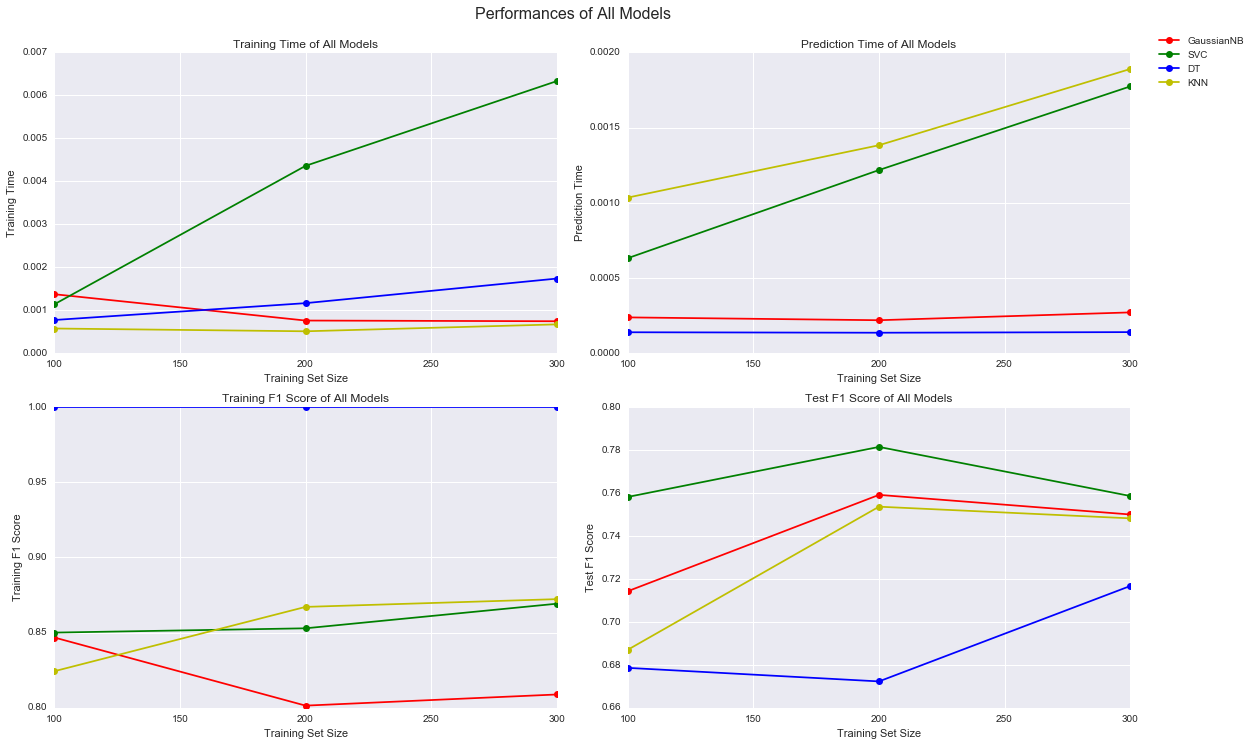

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

training_size = [100, 200, 300]
models = ['GaussianNB', 'SVC', 'DT', 'KNN']
metrics = ['Training Time', 'Prediction Time', 'Training F1 Score', 'Test F1 Score']

fig = plt.figure(figsize=(16, 10))

for k, metric in enumerate(metrics): 
    ax = fig.add_subplot(2, 2, k+1)
    ax.plot(training_size, results[metric]['GaussianNB'], 'o-', color = 'r', label = 'GaussianNB')
    ax.plot(training_size, results[metric]['SVC'], 'o-', color = 'g', label = 'SVC')
    ax.plot(training_size, results[metric]['DT'], 'o-', color = 'b', label = 'DT')
    ax.plot(training_size, results[metric]['KNN'], 'o-', color = 'y', label = 'KNN')

    # Labels
    ax.set_title('{} of All Models'.format(metric))
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel(metric)
    

# Visual aesthetics
ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
fig.suptitle('Performances of All Models', fontsize = 16, y = 1.03)
fig.tight_layout()
fig.show()

**Answer: **<br>
The **DT** classifier is apparently overfitting because it classifies the training data perfectly, with a F1 score of 1.0 for the training set. Compared to the **KNN** classifier, both **SVM** classiifer and **NB** classifier have better performances. **SVC** has the longest training time and the second longest prediction time. **DT** and **NB** have constantly low training and prediction times. **KNN** has the shortest training time but the longest prediction time. Given that the dataset in this problem is relatively small, computational cost would not be the major concern. Therefore, we should go with **SVC** for its slightly better performance.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **<br>
The Support Vector Machine (SVM) classifier separates the data with boundaries called decision boundaries. In Fig.1 shown below, the decision boudary is the dotted line, L, in the middle of two solid lines, L1 and L2. Given a training set, SVM first determines the support vectors, which are the data points that lie closest to the decision boundary. In Fig.1 the support vectors are represented by L1 and L2. Then the decision boundary is placed where the distances between the boundary and the support vectors are maximized. As shown in Fig.1, the distances from L to L1, L2 are maximized. Once the decision boundary is determined, the data are separated into two classes, Positive and Negative in the case of Fig.1. After the training is done, the classes of test set can be predicted by the position of each test data point relative to the decision boundary.

[Fig.1 - A Two-Class SVM Classifier](https://www.researchgate.net/figure/262275456_fig4_Fig-4-A-Two-class-SVM-classifier)
![A Two-class SVM classifier](https://www.researchgate.net/profile/Dawei_Li18/publication/262275456/figure/fig4/AS:296764058947585@1447765473602/Fig-4-A-Two-class-SVM-classifier.png "A two-class SVM classifier")

The Fig.1 shows the case when data can be separated by a straight line. When the data can't be separated by a straight line, we can perform the kernel method to transform the data from non-linearly separable to linearly separable. See Fig.2, a kernel function $\phi$ takes non-linearly separable input and map linearly separable output so that SVM can be applied to classifiy the data.

[Fig. 2 - Kernel Method](https://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png)
![Kernel Method](https://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png "Kernel Method")

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [12]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'kernel':('linear','rbf'),
              'C':(0.01, 0.1, 1, 10),
              'gamma': (0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1),
              'class_weight': (None, 'balanced')}

# TODO: Initialize the classifier
clf = SVC(random_state=0)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)[1])
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)[1])
print "\nTuned model: {}".format(clf)

Tuned model has a training F1 score of 0.8434.
Tuned model has a testing F1 score of 0.7862.

Tuned model: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **<br>

| Model | F1 Score (train) | F1 Score (test) |
| :---------------: | :--------------: | :-------------: |
| Untuned           |      0.8692      |     0.7586      |
| Tuned             |      0.8434      |     0.7862      |

Tuned model gives lower training F1 score but higher test F1 score.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.